In [1]:
import pandas as pd
import numpy as np

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = 'latin1', header = None)

In [3]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = df[[5, 0]]
df.columns = ['twitts', 'sentiment']
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [5]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [6]:
sent_map = {0: 'negative', 4: 'positive'}

In [7]:
#WORD COUNTS

In [8]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


In [9]:
#CHARACTERS COUNT

In [10]:
df['char_counts'] = df['twitts'].apply(lambda x: len(x))
df.head()

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


In [11]:
#Average Word Length
#a function get_avg_word_len() in which we are calculating the average word length inside each sentences.

In [12]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) # != len(x)/len(words)

In [13]:
df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x))

In [14]:
len('this is nlp lesson')/4

4.5

In [15]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


In [16]:
#Stop Words Count
print(STOP_WORDS)

{'by', 'more', 'our', "'re", 'he', 'whoever', 'every', 'none', 'front', 'one', 'their', 'once', 'first', 'take', 'due', 'often', "'ll", 'towards', 'hence', 'hundred', 'in', 'she', 'up', 'onto', 'being', 'them', 'those', 'something', 'not', 'fifty', 'moreover', 'yours', 'last', 'meanwhile', 'show', 'though', 'nothing', 'ours', 'it', 'each', 'to', 'around', 'among', 'very', 'alone', 'nowhere', 'neither', '‘re', 'we', 'name', 'say', 'off', 'three', 'both', 'enough', 'whatever', 'became', 'go', 'these', 'herein', 'thru', 'against', 'mine', 'former', 'someone', 'bottom', 'hers', 'its', '‘s', 'give', 'twenty', 'otherwise', 'was', 'do', 'throughout', 'make', 'always', 'several', 'for', 'seem', 'although', 'why', 'all', 'hereupon', 'doing', 'anywhere', 'n‘t', 'at', 'become', 'per', '‘m', 'forty', 'serious', 'therein', 'on', 'who', 'somewhere', 'seemed', 'fifteen', 'beside', 'out', 'did', 'what', 'am', 'between', 'ever', 'nor', 'they', 'himself', 'upon', 'almost', 'if', 'least', 'next', 'with',

In [17]:
x = 'this is text data'

In [18]:
x.split()

['this', 'is', 'text', 'data']

In [19]:
len([t for t in x.split() if t in STOP_WORDS])

2

In [20]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


In [21]:
#Count #HashTags and @Mentions

In [22]:
x = 'this #hashtag and this is @mention'
# x = x.split()
# x

In [23]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [24]:
['@mention']

['@mention']

In [25]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


In [26]:
#If numeric digits are present in twitts, we are calculating the number of digits in each sentences.

In [27]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


In [28]:
#UPPER case words count
# calculating the number of UPPERcase words in each sentences if length is more than 3.

In [29]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [30]:
df.loc[96]['twitts']
"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

In [31]:
#Preprocessing and Cleaning

In [32]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())     #lower case conversion
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0


In [33]:
#Contraction to Expansion

In [34]:
x = "i don't know what you want, can't, he'll, i'd"
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [35]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
x = "hi, i'd be happy"
cont_to_exp(x)
'hi, i would be happy'

'hi, i would be happy'

In [36]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))


CPU times: user 51.5 s, sys: 88.6 ms, total: 51.6 s
Wall time: 51.6 s


In [37]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1


In [38]:
#Count and Remove Emails

In [39]:
import re
x = 'hi my email me at email@email.com another@email.com'
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)
['email@email.com', 'another@email.com']
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))
df['emails_count'] = df['emails'].apply(lambda x: len(x))
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [40]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)
'hi my email me at  '
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [41]:
#Count URLs and Remove it

In [42]:
x = 'hi, to watch more visit https://youtube.com/kgptalkie'
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)
[('https', 'youtube.com', '/kgptalkie')]
df['urls_flag'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x)
'hi, to watch more visit '
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [43]:
df.loc[0]['twitts']
'@switchfoot  - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

'@switchfoot  - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

In [44]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "", x))    # Remove RT

In [45]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))    #Special Chars removal or punctuation removal
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,0


In [46]:
x = 'thanks    for    watching and    please    like this video'     #Remove multiple spaces "hi hello "
" ".join(x.split())
'thanks for watching and please like this video'
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0


In [47]:
from bs4 import BeautifulSoup             #Remove HTML Tags
x = '<html><h2>Thanks for watching</h2></html>'
BeautifulSoup(x, 'lxml').get_text()

'Thanks for watching'

In [48]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

CPU times: user 6min 41s, sys: 10.5 s, total: 6min 51s
Wall time: 6min 52s


In [49]:
import unicodedata      #Remove Accented Chars
x = 'Áccěntěd těxt'
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x
remove_accented_chars(x)

'Accented text'

In [50]:
#SpaCy and NLP ,Remove Stop Words

In [51]:
import spacy
x = 'this is stop words removal code is a the an how what'
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [52]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


In [53]:
#Convert into base or root form of word
nlp = spacy.load('en_core_web_sm')
x = 'kenichan dived times ball managed save 50 rest'
# dive = dived, time = times, manage = managed
# x = 'i you he she they is am are'

In [54]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))
        
make_to_base(x)

kenichan dive times ball manage save 50 rest


In [55]:
' '.join(df.head()['twitts'])   #Common words removal

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [56]:
text = ' '.join(df['twitts'])
text = text.split()
freq_comm = pd.Series(text).value_counts()
f20 = freq_comm[:20]

In [57]:
f20

good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
thanks    39311
home      39168
dtype: int64

In [58]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

In [59]:
#Rare words removal
rare20 = freq_comm[-20:]
rare20

johnaferguson               1
elbertc                     1
grateful-about-our-lives    1
adsi                        1
denselol                    1
universeoh                  1
jreb                        1
laundrygoing                1
edgargoncalves              1
meredithgoad                1
abbyitalia                  1
lalouline                   1
cruncy                      1
timbuckley                  1
todayunlike                 1
tweetytweeets               1
anymoremigraines            1
78quot                      1
hapaxes                     1
areshe                      1
dtype: int64

In [60]:
rare = freq_comm[freq_comm.values == 1]
rare

vnext               1
batsday             1
burred              1
jonascyrusswift     1
skillsrmstatsica    1
                   ..
tweetytweeets       1
anymoremigraines    1
78quot              1
hapaxes             1
areshe              1
Length: 536196, dtype: int64

In [61]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


In [62]:
!pip install wordcloud

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
x = ' '.join(text[:20000])
len(text)

10837079

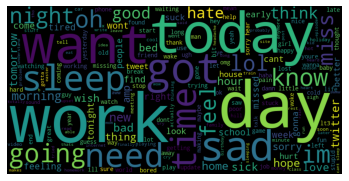

In [64]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [65]:
#Spelling Correction
from textblob import TextBlob
x = 'tanks forr waching this vidio carri'
x = TextBlob(x).correct()
x


TextBlob("tanks for watching this video carry")

In [66]:
#Tokenization

In [67]:
x = 'thanks#watching this video. please like it'
TextBlob(x).words


WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [68]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


In [69]:
#Lemmatization

In [70]:
x = 'runs run running ran'
from textblob import Word
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [71]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


In [72]:
#Detect Entities using NER of SpaCy
#Named Entity Recognition (NER) is a standard NLP problem which involves spotting named entities (people, places, organizations etc.) from a chunk of text, and classifying them into a predefined set of categories. Some of the practical applications of NER include:
#Scanning news articles for the people, organizations and locations reported.
#Providing concise features for search optimization: instead of searching the entire content, one may simply search for the major entities involved.
#Quickly retrieving geographical locations talked about in Twitter posts.

In [73]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [74]:
from spacy import displacy
displacy.render(doc, style = 'ent')

In [75]:
#Detecting Nouns
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [76]:
for noun in doc.noun_chunks:
    print(noun)

Breaking
News
Donald Trump
the president
the USA
a deal
the moon


In [77]:
#Translation and Language Detection
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [78]:
tb = TextBlob(x)
#tb.detect_language()

In [79]:
#Use inbuilt sentiment classifier

In [80]:
from textblob.sentiments import NaiveBayesAnalyzer
x = 'we all stands together to fight with corona virus. we will win together'
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())
tb.sentiment
# classification of sentiment into positive and negative

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [81]:
x = 'we all are sufering from corona'
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='pos', p_pos=0.75616044472398, p_neg=0.2438395552760203)

In [82]:
#Advanced text processing

In [83]:
x = 'thanks for watching'
tb = TextBlob(x)
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'watching'])]

In [84]:
#Bag of Words (feature extraction, dictionary  )
x = ['This is first sentence this is','This is second','This is last']
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)
text_counts.toarray()
cv.get_feature_names()
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [86]:
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]])

In [87]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [88]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [89]:
bow #used to extract feature and classify text

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [90]:
x

['This is first sentence this is', 'This is second', 'This is last']

In [91]:
#Term Frequency (is normalized)
# is simply the ratio of the count of a word present in a sentence,to the length of the sentence.

In [92]:
bow.shape

(3, 6)

In [93]:
tf = bow.copy()

In [94]:
#for row in bow.iterrows():
 #   print(row[1]/sum(row))

In [95]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [96]:
tf #normalized form of bag of words, Problrm: gives emphasis to word which occurs more hence stop words may get more emphasis,use idf

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.000000,0.000000,0.166667,0.333333
1,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333
2,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333


In [97]:
##Inverse Document Frequency

In [98]:
#idf = log((1+N)/(n+1)) + 1 used in sklearn when smooth_idf = True
#where, N is the total number of rows and n is the number of rows in which the word was present.

In [99]:
import numpy as np

In [100]:
x_df = pd.DataFrame(x, columns=['words'])

In [101]:
x_df

,words
0,This is first sentence this is
1,This is second
2,This is last


In [102]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [103]:
N=bow.shape[0]
N

3

In [104]:
bb = bow.astype('bool')
bb     #true for words present in the sentence

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [105]:
bb['is'].sum()

3

In [106]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [107]:
nz=[]
for col in cols:
    nz.append(bb[col].sum())

In [108]:
nz

[1, 3, 1, 1, 1, 3]

In [109]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index] + 1)) + 1)

In [110]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [111]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [112]:
## TF-IDf

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [115]:
x_tfidf.toarray()

array([[0.45688214, 0.5396839 , 0.        , 0.        , 0.45688214,
        0.5396839 ],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [116]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [117]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [118]:
##Word Embeddings

SpaCy Word2Vec

In [119]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 782.7 MB 5.3 kB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [120]:
nlp = spacy.load('en_core_web_lg')

In [121]:
doc = nlp('thank you! welcome. dog cat lion')

In [122]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
welcome True
. True
dog True
cat True
lion True


In [123]:
token.vector.shape

(300,)

In [124]:
nlp('cat').vector

array([-0.15067  , -0.024468 , -0.23368  , -0.23378  , -0.18382  ,
        0.32711  , -0.22084  , -0.28777  ,  0.12759  ,  1.1656   ,
       -0.64163  , -0.098455 , -0.62397  ,  0.010431 , -0.25653  ,
        0.31799  ,  0.037779 ,  1.1904   , -0.17714  , -0.2595   ,
       -0.31461  ,  0.038825 , -0.15713  , -0.13484  ,  0.36936  ,
       -0.30562  , -0.40619  , -0.38965  ,  0.3686   ,  0.013963 ,
       -0.6895   ,  0.004066 , -0.1367   ,  0.32564  ,  0.24688  ,
       -0.14011  ,  0.53889  , -0.80441  , -0.1777   , -0.12922  ,
        0.16303  ,  0.14917  , -0.068429 , -0.33922  ,  0.18495  ,
       -0.082544 , -0.46892  ,  0.39581  , -0.13742  , -0.35132  ,
        0.22223  , -0.144    , -0.048287 ,  0.3379   , -0.31916  ,
        0.20526  ,  0.098624 , -0.23877  ,  0.045338 ,  0.43941  ,
        0.030385 , -0.013821 , -0.093273 , -0.18178  ,  0.19438  ,
       -0.3782   ,  0.70144  ,  0.16236  ,  0.0059111,  0.024898 ,
       -0.13613  , -0.11425  , -0.31598  , -0.14209  ,  0.0281

In [125]:
#calculating similarity between words using vectors

In [126]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token.similarity(token2))
    print()

thank thank 0.13629763
thank you 0.20392053
thank ! 0.19601384
thank welcome 0.13807522
thank . 0.1754697
thank dog 0.47424486
thank cat 0.5265438
thank lion 1.0

you thank 0.13629763
you you 0.20392053
you ! 0.19601384
you welcome 0.13807522
you . 0.1754697
you dog 0.47424486
you cat 0.5265438
you lion 1.0

! thank 0.13629763
! you 0.20392053
! ! 0.19601384
! welcome 0.13807522
! . 0.1754697
! dog 0.47424486
! cat 0.5265438
! lion 1.0

welcome thank 0.13629763
welcome you 0.20392053
welcome ! 0.19601384
welcome welcome 0.13807522
welcome . 0.1754697
welcome dog 0.47424486
welcome cat 0.5265438
welcome lion 1.0

. thank 0.13629763
. you 0.20392053
. ! 0.19601384
. welcome 0.13807522
. . 0.1754697
. dog 0.47424486
. cat 0.5265438
. lion 1.0

dog thank 0.13629763
dog you 0.20392053
dog ! 0.19601384
dog welcome 0.13807522
dog . 0.1754697
dog dog 0.47424486
dog cat 0.5265438
dog lion 1.0

cat thank 0.13629763
cat you 0.20392053
cat ! 0.19601384
cat welcome 0.13807522
cat . 0.1754697
cat do

In [127]:
## ML model for Text Classification  

In [128]:
# classifying on this huge dataset is very time taking, therefore train on samples.

In [129]:
df0 = df[df['sentiment']==0].sample(2000)
df4 = df[df['sentiment']==4].sample(2000)

In [130]:
dfr = df0.append(df4)

In [131]:
dfr.shape

(4000, 13)

In [132]:
dfr

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
303130,selena gomez taylor lautner ruined,0,13,73,4.615385,4,0,0,0,0,[],0,0
234715,nice fried breakfast yum crack,0,12,63,4.250000,4,0,0,0,0,[],0,0
346731,dannymcfly ok goodbye fine hope face face,0,25,121,3.840000,12,0,1,0,1,[],0,0
756186,neda longer trending topic iranelection,0,7,48,5.714286,2,2,0,0,1,[],0,0
332950,tired butt load homework,0,13,60,3.615385,7,0,0,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338788,mllandry christinemv thank working farah hair,4,14,86,5.071429,4,0,2,0,1,[],0,0
1206489,listening quotsunshinequot blazelvegarmidoneol...,4,13,90,5.923077,3,0,0,0,0,[],0,0
1309503,getting warm fuzzies inside studios kuam kuam ...,4,26,140,4.384615,9,0,0,0,2,[],0,0
902763,beverleyknight hiyaaaaaa scan wow amazing crie...,4,15,90,5.000000,6,0,1,0,0,[],0,0


In [133]:
# Manual features
dfr_feat = dfr.drop(labels=['twitts','sentiment', 'emails'], axis =1)

In [134]:
dfr_feat

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag
303130,13,73,4.615385,4,0,0,0,0,0,0
234715,12,63,4.250000,4,0,0,0,0,0,0
346731,25,121,3.840000,12,0,1,0,1,0,0
756186,7,48,5.714286,2,2,0,0,1,0,0
332950,13,60,3.615385,7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1338788,14,86,5.071429,4,0,2,0,1,0,0
1206489,13,90,5.923077,3,0,0,0,0,0,0
1309503,26,140,4.384615,9,0,0,0,2,0,0
902763,15,90,5.000000,6,0,1,0,0,0,0


In [135]:
y = dfr['sentiment']

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

In [137]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['twitts'])

In [138]:
text_counts.toarray().shape

(4000, 9747)

In [139]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [140]:
dfr_bow

,01,0100,018,0630,0734,0g,10,100,1000,100th,...,zoe,zole,zombie,zoo,zooey,zoomin,zooming,zxxxx,zyxwvutsrqponmlkjihgfedcba,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
dfr_bow.head()

,01,0100,018,0630,0734,0g,10,100,1000,100th,...,zoe,zole,zombie,zoo,zooey,zoomin,zooming,zxxxx,zyxwvutsrqponmlkjihgfedcba,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
## ML Algorithms

In [143]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [144]:
sgd = SGDClassifier(n_jobs=-1,random_state = 42, max_iter=200)
lgr = LogisticRegression(random_state = 42, max_iter = 200)
lgrcv =  LogisticRegressionCV(cv = 2, random_state = 42, max_iter=1000)
svm = LinearSVC(random_state = 42, max_iter = 200)
rfc = RandomForestClassifier(random_state = 42, n_jobs = -1, n_estimators = 200)

In [145]:
clf = {'SGD' : sgd, 'LGR':lgr, 'LGR-CV':lgrcv, 'SVM':svm, 'RFC':rfc}

In [146]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [147]:
def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y )
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

In [148]:
%%time
classify(dfr_bow, y)

SGD  --->  0.67125
LGR  --->  0.66375
LGR-CV  --->  0.66625
SVM  --->  0.66375
RFC  --->  0.63375
CPU times: user 3min 6s, sys: 23.1 s, total: 3min 29s
Wall time: 56.6 s


In [149]:
##### Manual Feature

In [150]:
dfr_feat

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag
303130,13,73,4.615385,4,0,0,0,0,0,0
234715,12,63,4.250000,4,0,0,0,0,0,0
346731,25,121,3.840000,12,0,1,0,1,0,0
756186,7,48,5.714286,2,2,0,0,1,0,0
332950,13,60,3.615385,7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1338788,14,86,5.071429,4,0,2,0,1,0,0
1206489,13,90,5.923077,3,0,0,0,0,0,0
1309503,26,140,4.384615,9,0,0,0,2,0,0
902763,15,90,5.000000,6,0,1,0,0,0,0


In [151]:
dfr_feat.head(2)

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag
303130,13,73,4.615385,4,0,0,0,0,0,0
234715,12,63,4.250000,4,0,0,0,0,0,0


In [152]:
%%time
classify(dfr_feat, y)

SGD  --->  0.57625
LGR  --->  0.5825
LGR-CV  --->  0.575
SVM  --->  0.58125
RFC  --->  0.53
CPU times: user 3.72 s, sys: 1.87 s, total: 5.58 s
Wall time: 2.34 s


In [153]:
##### Manual + Bow

In [154]:
X  = dfr_feat.join(dfr_bow)
X

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag,...,zoe,zole,zombie,zoo,zooey,zoomin,zooming,zxxxx,zyxwvutsrqponmlkjihgfedcba,zzzzzzz
303130,13,73,4.615385,4,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234715,12,63,4.250000,4,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346731,25,121,3.840000,12,0,1,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
756186,7,48,5.714286,2,2,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332950,13,60,3.615385,7,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338788,14,86,5.071429,4,0,2,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206489,13,90,5.923077,3,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309503,26,140,4.384615,9,0,0,0,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902763,15,90,5.000000,6,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
##TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [156]:
dfr.shape

(4000, 13)

In [157]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['twitts'])

In [158]:
%%time
classify(pd.DataFrame(X.toarray()),y)

SGD  --->  0.66125
LGR  --->  0.6625
LGR-CV  --->  0.66
SVM  --->  0.65125
RFC  --->  0.66125
CPU times: user 2min 57s, sys: 20.4 s, total: 3min 18s
Wall time: 56.1 s


In [159]:
## Word2Vec
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)


In [160]:
%%time
dfr['vec'] = dfr['twitts'].apply(lambda x: get_vec(x))

CPU times: user 37 s, sys: 39.4 ms, total: 37 s
Wall time: 37 s
